## INTERVALOS DE CONFIANZA EN PYTHON

**Repaso de estimación puntual**

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [6]:
np.random.seed(2020)
population_ages1 = stats.poisson.rvs(loc = 18, mu = 35, size = 1500000)
population_ages2 = stats.poisson.rvs(loc = 18, mu = 15, size = 1000000)

In [8]:
population_ages = np.concatenate((population_ages1, population_ages2))

In [10]:
print(population_ages1.mean())
print(population_ages2.mean())
print(population_ages.mean())

52.998824666666664
32.999049
44.9989144


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17e00de8d0>]],
      dtype=object)

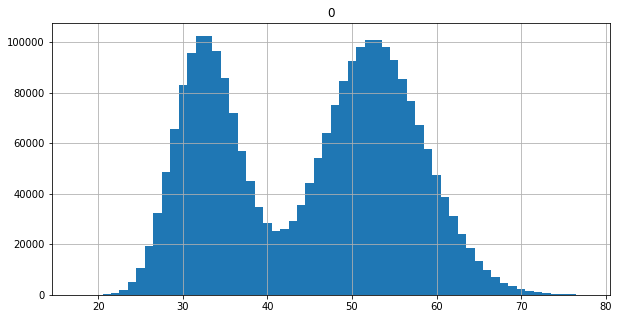

In [19]:
pd.DataFrame(population_ages).hist(bins = 60, range =(17.5, 77.5),
                                  figsize = (10, 5))

In [20]:
stats.skew(population_ages)

-0.05113528002533029

In [22]:
stats.kurtosis(population_ages)

-1.2235548276771904

In [23]:
np.random.seed(2020)
sample_ages = np.random.choice(population_ages, 500)

In [25]:
print(sample_ages.mean())

44.79


In [26]:
population_ages.mean() - sample_ages.mean()

0.2089143999999976

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17d3a3a590>]],
      dtype=object)

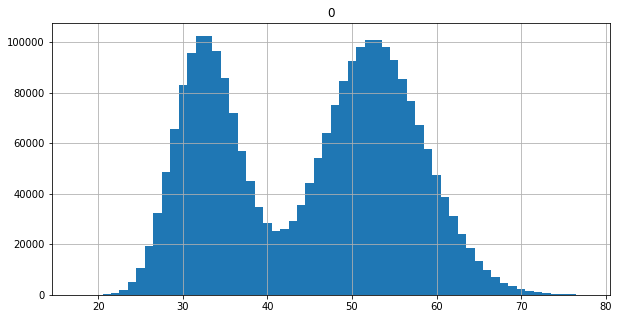

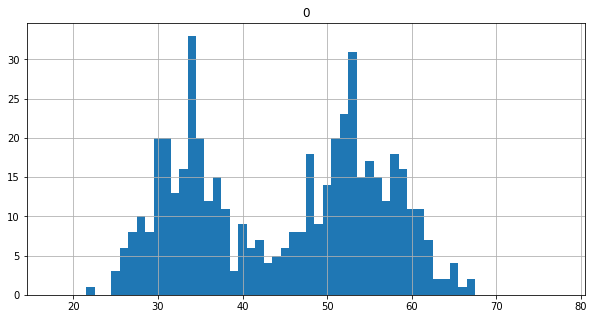

In [40]:
pd.DataFrame(population_ages).hist(bins = 60, range =(17.5, 77.5),
                                  figsize = (10, 5))
pd.DataFrame(sample_ages).hist(bins = 60, range =(17.5, 77.5),
                                  figsize = (10, 5))

In [27]:
random.seed(22)
population_races = ((["blanca"]*1000000) + (["negra"]*500000) + 
                   (['asiatica']*250000 + (['otros']*250000)))

In [31]:
for race in set(population_races):
    print("Proporcion de gente " + race + ":")
    print(population_races.count(race) / 2500000)

Proporcion de gente negra:
0.2
Proporcion de gente asiatica:
0.1
Proporcion de gente blanca:
0.4
Proporcion de gente otros:
0.1


In [34]:
random_sample = random.sample(population_races, 100)

In [35]:
for race in set(random_sample):
    print("Proporcion de gente " + race + ":")
    print(population_races.count(race) / 2500000)

Proporcion de gente negra:
0.2
Proporcion de gente asiatica:
0.1
Proporcion de gente blanca:
0.4
Proporcion de gente otros:
0.1


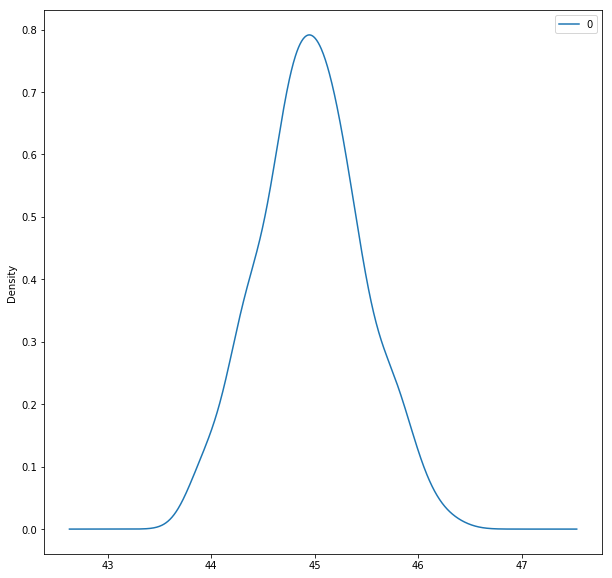

In [43]:
np.random.sample(1968)
point_estimates = []

for x in range(200):
    sample = np.random.choice(population_ages, size = 500)
    point_estimates.append(sample.mean())

pd.DataFrame(point_estimates).plot(kind='density', figsize = (10,10))

In [44]:
np.array(point_estimates).mean()

44.9604

**Intervalos de confianza**

In [50]:
np.random.seed(2020)

n = 1000
alpha = 0.05
sample = np.random.choice(population_ages, size = n)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 1-alpha/2)

sigma = population_ages.std() ## sigma de la población

sample_error = z_critical * sigma / math.sqrt(n)

ci = (sample_mean - sample_error, sample_mean + sample_error)
ci

(44.21263250684691, 45.58736749315309)

In [52]:
np.random.seed(2020)

n = 1000
alpha = 0.05
sample = np.random.choice(population_ages, size = n)
sample_mean = sample.mean()
intervals = []
sample_means = []
z_critical = stats.norm.ppf(q = 1-alpha/2)
sample_error = z_critical * sigma / math.sqrt(n)


for sample in range(100):
    sample = np.random.choice(population_ages, size = n)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)


    sigma = population_ages.std() ## sigma de la población

    ci = (sample_mean - sample_error, sample_mean + sample_error)
    intervals.append(ci)

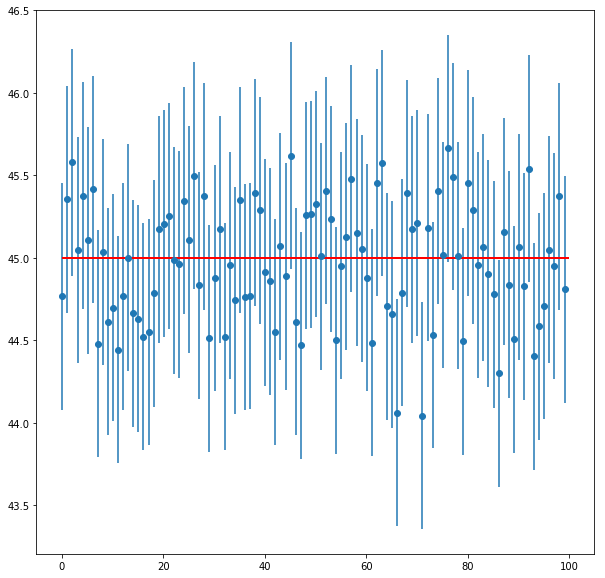

In [56]:
plt.figure(figsize = (10, 10))
plt.errorbar(x = np.arange(0.1, 100, 1), y = sample_means, yerr=[(top-bottom)/2 for top, bottom in intervals],
            fmt = 'o')
plt.hlines(xmin = 0, xmax = 100, y = population_ages.mean(), linewidth = 2.0, color = 'red')

**En caso de que la desvicación típica ($\sigma$) no es conocida**

In [60]:
np.random.seed(2020)

n = 1000
alpha = 0.05
sample = np.random.choice(population_ages, size = n)
sample_mean = sample.mean()
intervals = []
sample_means = []
t_critical = stats.t.ppf(q = 1-alpha/2, df = n - 1)
sample_error = t_critical * sigma / math.sqrt(n)


for sample in range(100):
    sample = np.random.choice(population_ages, size = n)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)


    sample_sd = sample.std(ddof = -1) ## sigma de la muestra
    # Añadimos ddof para mostrar que es muestral y por tanto multiplica por n - 1

    ci = (sample_mean - sample_error, sample_mean + sample_error)
    intervals.append(ci)

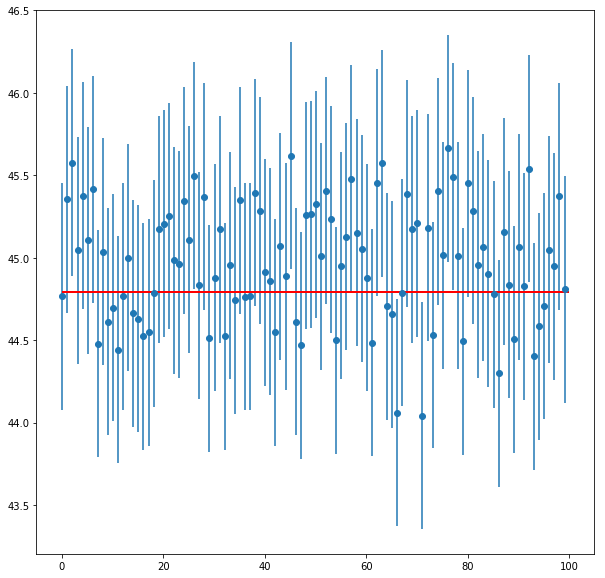

In [61]:
plt.figure(figsize = (10, 10))
plt.errorbar(x = np.arange(0.1, 100, 1), y = sample_means, yerr=[(top-bottom)/2 for top, bottom in intervals],
            fmt = 'o')
plt.hlines(xmin = 0, xmax = 100, y = sample_ages.mean(), linewidth = 2.0, color = 'red')

In [65]:
stats.t.interval(alpha = 0.95, df = n - 1, loc = sample_mean,
                scale = sample_sd/math.sqrt(n))
# Esta función automatiza el proceso

(44.127639124899474, 45.488360875100526)

**Intervalos de confianza para proporciones**

In [74]:
alpha = 0.05
z_critical = stats.norm.ppf(q = 1-alpha/2)
p_hat = random_sample.count("blanca") / len(population_races) 

sample_error = z_critical * math.sqrt((p_hat*(1-p_hat)/n))

ci = (p_hat - sample_error, p_hat + sample_error)
ci

(-0.00028227913108839223, 0.00033127913108839223)

In [75]:
stats.norm.interval(alpha = 0.95, loc = p_hat,
                   scale = math.sqrt(p_hat*(1-p_hat)/n))

(-0.00028227913108839223, 0.00033127913108839223)